# 1. Install and Import Dependencies

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2
from IPython.display import Image  # for displaying images
import os
import random
import shutil
from sklearn.model_selection import train_test_split
import xml.etree.ElementTree as ET
from xml.dom import minidom
from tqdm import tqdm
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt
import uuid   # Unique identifier
import os
import time

random.seed(108)

# 2. Load Model

In [3]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-1-9 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [4]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

# 3. load data

In [ ]:
#!unzip "/content/drive/MyDrive/paper 3 siham/data/data1_yolov5.zip" -d "/content/drive/MyDrive/paper 3 siham/data"

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/paper 3 siham/data/data1_yolov5/labels/train/4966.txt  
  inflating: /content/drive/MyDrive/paper 3 siham/data/data1_yolov5/labels/train/4968.txt  
  inflating: /content/drive/MyDrive/paper 3 siham/data/data1_yolov5/labels/train/4969.txt  
  inflating: /content/drive/MyDrive/paper 3 siham/data/data1_yolov5/labels/train/497.txt  
  inflating: /content/drive/MyDrive/paper 3 siham/data/data1_yolov5/labels/train/4970.txt  
  inflating: /content/drive/MyDrive/paper 3 siham/data/data1_yolov5/labels/train/4973.txt  
  inflating: /content/drive/MyDrive/paper 3 siham/data/data1_yolov5/labels/train/4974.txt  
  inflating: /content/drive/MyDrive/paper 3 siham/data/data1_yolov5/labels/train/4975.txt  
  inflating: /content/drive/MyDrive/paper 3 siham/data/data1_yolov5/labels/train/4977.txt  
  inflating: /content/drive/MyDrive/paper 3 siham/data/data1_yolov5/labels/train/4979.txt  
  inflating: /content/drive/My

In [5]:
cd /content/drive/MyDrive/paper 3 siham/data1_notebooks/1.yolov5

/content/drive/MyDrive/paper 3 siham/data1_notebooks/1.yolov5


In [ ]:
!pwd

/content/drive/MyDrive/paper 3 siham/data1_notebooks/1.yolov5


# 4. Train from scratch

In [6]:
t1=time.time()
#!python train.py  --img 640 --batch 16 --epochs 70 --data dataset_v2.yaml --weights /content/drive/MyDrive/paper 3 siham/data1_notebooks/1.yolov5/yolov5s.pt --cache
!python train.py --img 640 --batch 16 --epochs 70 --data "/content/drive/MyDrive/paper 3 siham/data1_notebooks/1.yolov5/dataset_v2.yaml" --weights "/content/drive/MyDrive/paper 3 siham/data1_notebooks/1.yolov5/yolov5s.pt" --cache

t2= time.time()
temps_execution = t2 - t1
print(f"Le temps d'exécution est de {temps_execution} secondes.")


2024-01-09 10:30:49.703964: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-09 10:30:49.704012: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-09 10:30:49.705360: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=/content/drive/MyDrive/paper 3 siham/data1_notebooks/1.yolov5/yolov5s.pt, cfg=, data=/content/drive/MyDrive/paper 3 siham/data1_notebooks/1.yolov5/dataset_v2.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=70, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cac

# 5. Inference

In [8]:
#model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/drive/MyDrive/paper 3 siham/data1_notebooks/1.yolov5/runs/train/exp4/weights/last.pt', force_reload=True)
#/content/drive/MyDrive/paper 3 siham/data1_notebooks/1.yolov5/runs/train/exp5/weights/best.pt
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/drive/MyDrive/paper 3 siham/data1_notebooks/1.yolov5/runs/train/exp6/weights/best.pt', force_reload=True)


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2024-1-9 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [9]:
t3=time.time()
#!python detect.py --source /content/drive/MyDrive/paper 3 siham/data/data1_yolov5/images/test  --weights /content/drive/MyDrive/paper 3 siham/data1_notebooks/1.yolov5/runs/train/exp4/weights/best.pt --conf 0.25 --name test_prediction
!python detect.py --source "/content/drive/MyDrive/paper 3 siham/data/data1_yolov5/images/test"  --weights "/content/drive/MyDrive/paper 3 siham/data1_notebooks/1.yolov5/runs/train/exp6/weights/best.pt" --conf 0.25 --name test_prediction

t4= time.time()
temps_execution = t4 - t3
print(f"Le temps d'exécution est de {temps_execution} secondes.")

detect: weights=['/content/drive/MyDrive/paper 3 siham/data1_notebooks/1.yolov5/runs/train/exp6/weights/best.pt'], source=/content/drive/MyDrive/paper 3 siham/data/data1_yolov5/images/test, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=test_prediction, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 2024-1-5 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/2433 /content/drive/MyDrive/paper 3 siham/data/data1_yolov5/images/test/1000.jpg: 480x640 1 no_cheating, 75.2ms
image 2/2433 /content/drive/MyDrive/paper 3 siham/data/data1_yolov5/images/test/10011

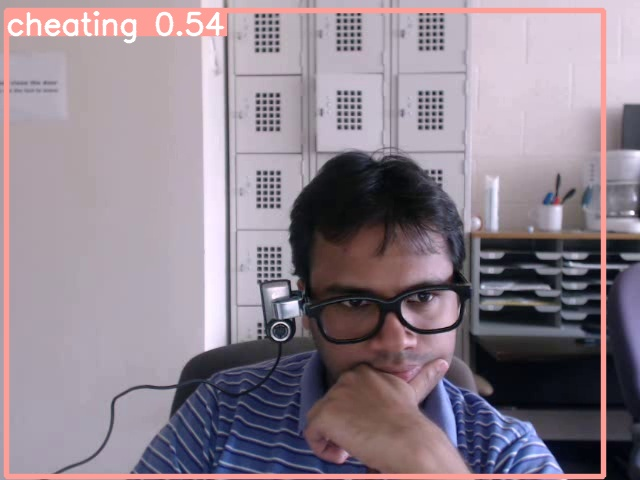

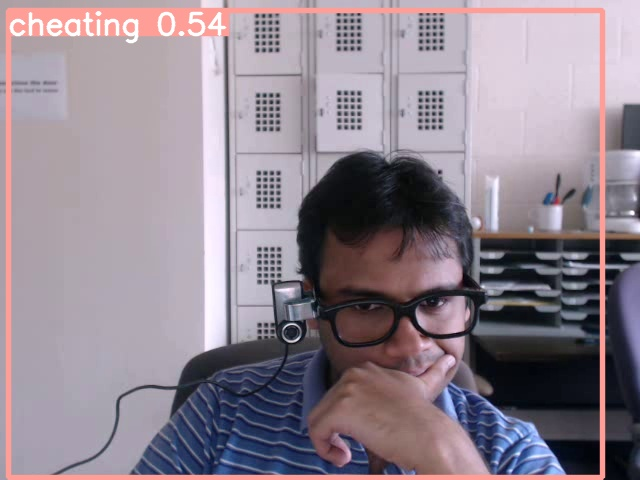

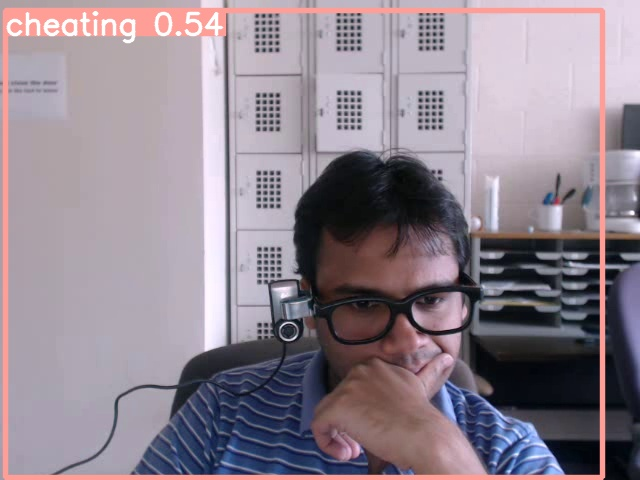

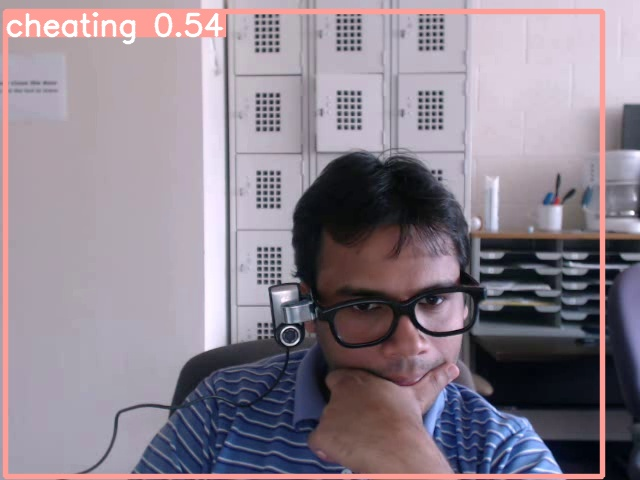

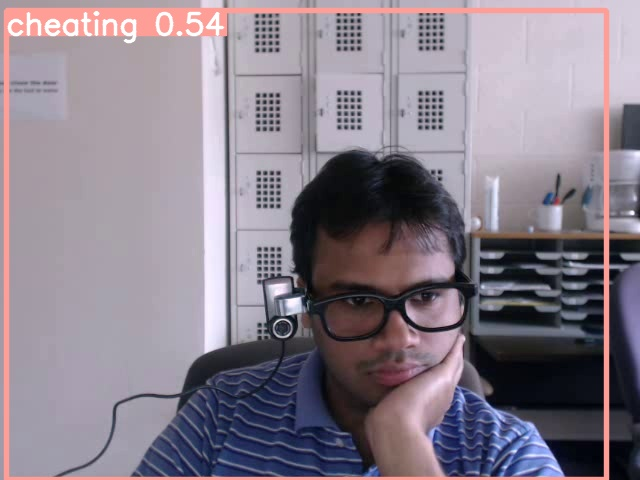

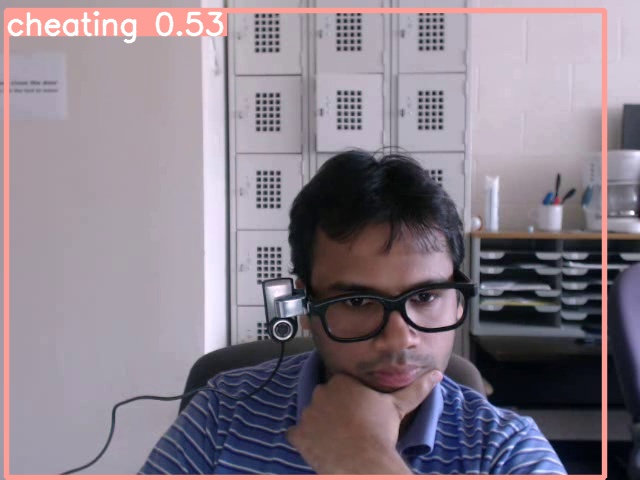

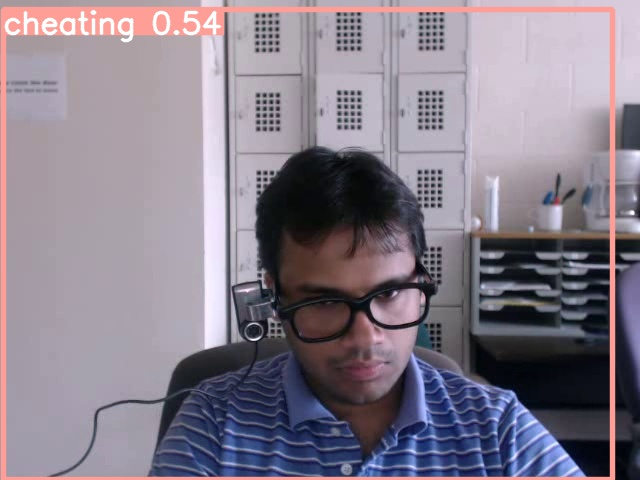

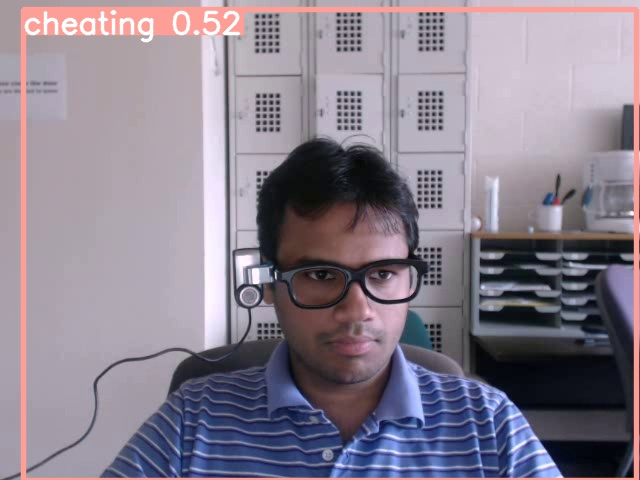

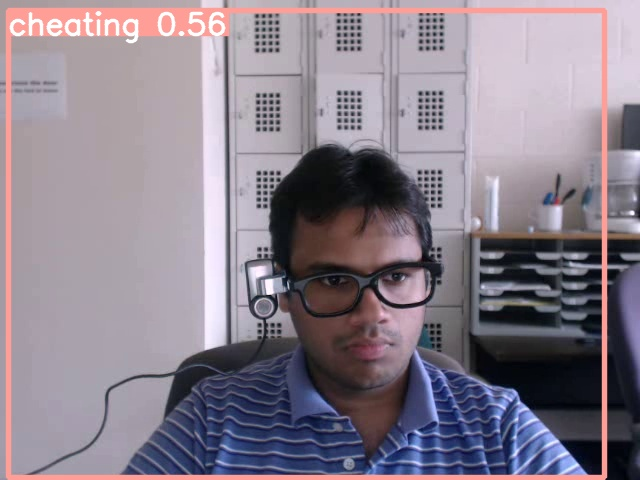

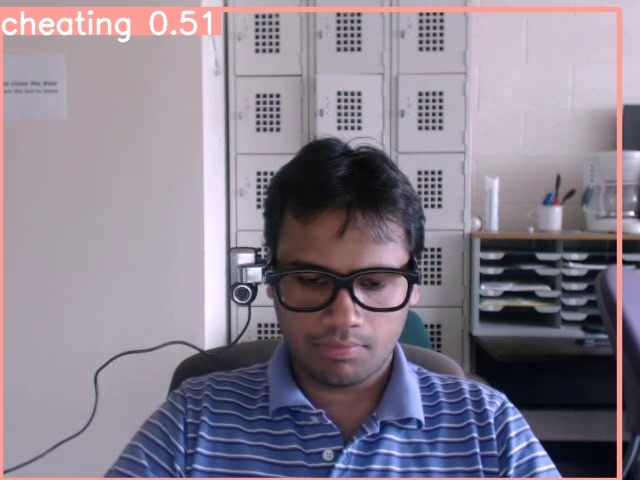

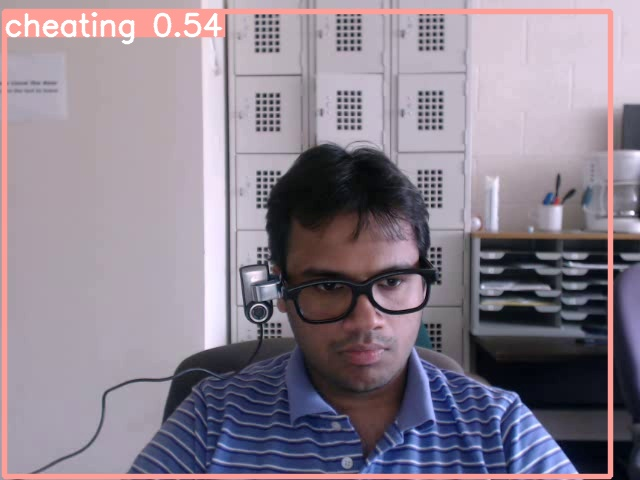

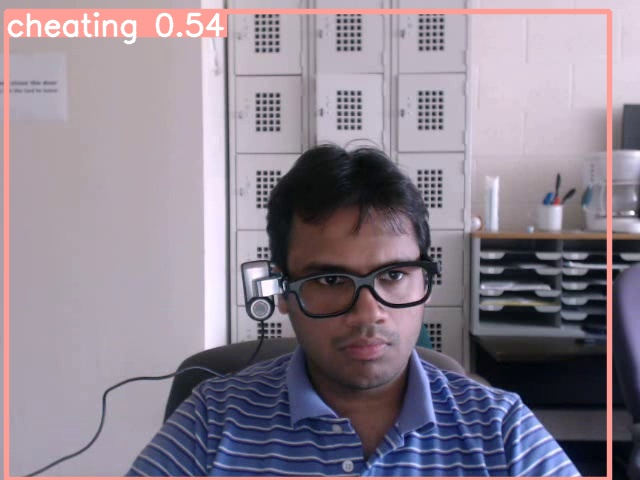

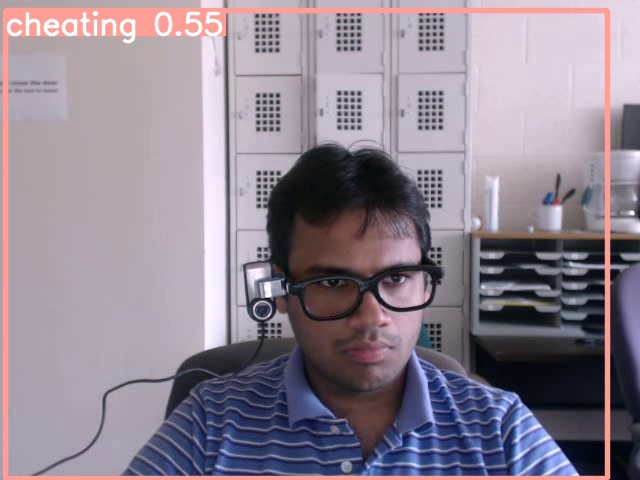

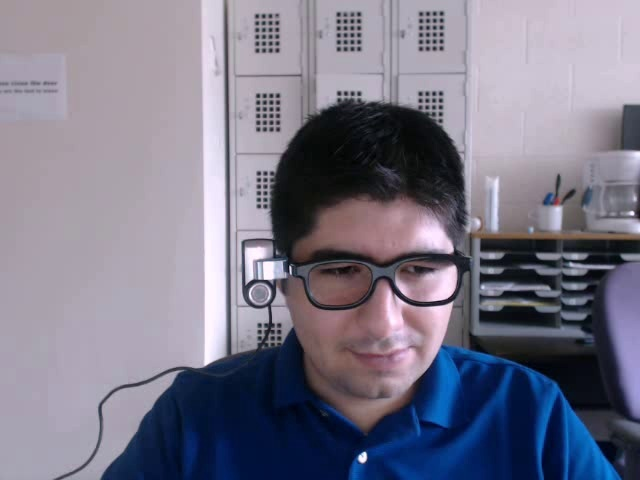

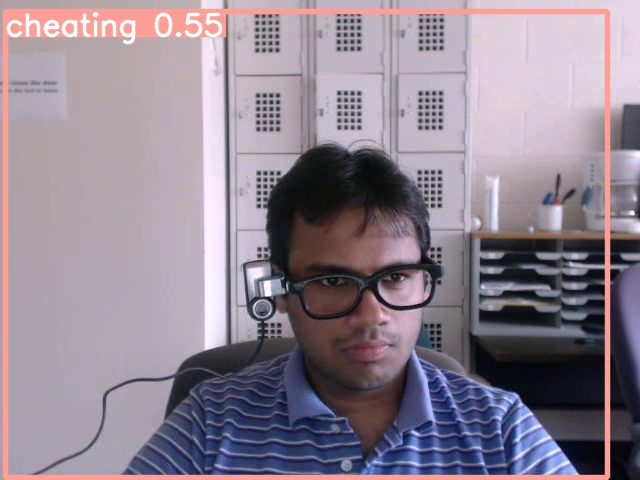

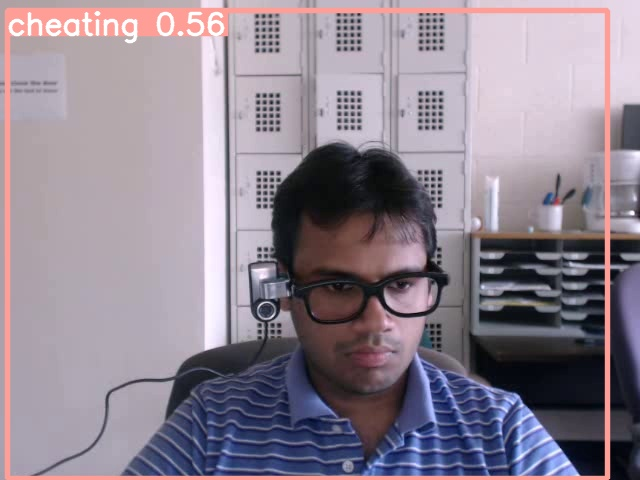

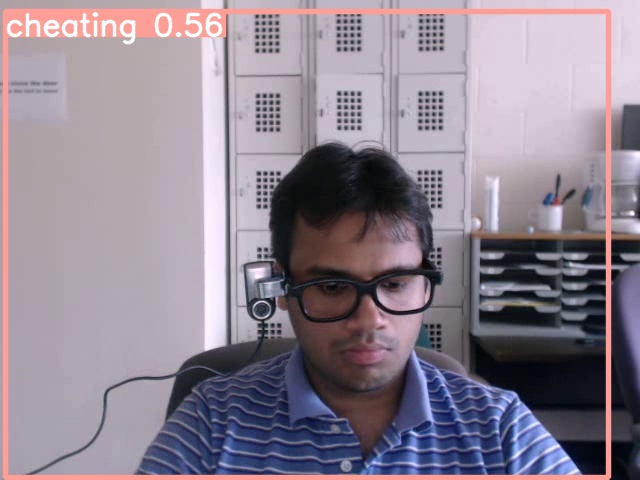

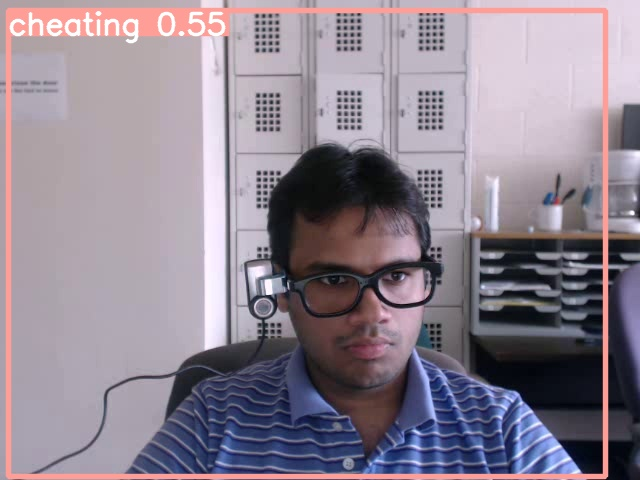

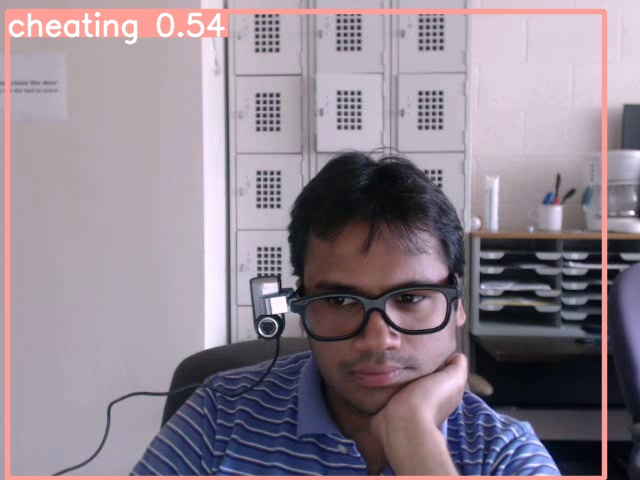

In [12]:
import glob
from IPython.display import Image, display
i=0
for imageName in glob.glob ('/content/drive/MyDrive/paper 3 siham/data1_notebooks/1.yolov5/runs/detect/test_prediction/*.jpg'):
  i+=1
  if i<20:
    display(Image(filename=imageName))
    print('\n')

#Computing the mAP on the test dataset

In [11]:
t5=time.time()
#!python val.py --weights  /content/drive/MyDrive/paper 3 siham/data1_notebooks/1.yolov5/runs/train/exp/weights/best.pt --data dataset_v2.yaml --task test
!python val.py --weights  "/content/drive/MyDrive/paper 3 siham/data1_notebooks/1.yolov5/runs/train/exp6/weights/best.pt" --data "/content/drive/MyDrive/paper 3 siham/data1_notebooks/1.yolov5/dataset_v2.yaml" --task test

t6= time.time()
temps_execution = t6 - t5
print(f"Le temps d'exécution est de {temps_execution} secondes.")

val: data=/content/drive/MyDrive/paper 3 siham/data1_notebooks/1.yolov5/dataset_v2.yaml, weights=['/content/drive/MyDrive/paper 3 siham/data1_notebooks/1.yolov5/runs/train/exp6/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 2024-1-5 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
test: Scanning /content/drive/MyDrive/paper 3 siham/data/data1_yolov5/labels/test... 2433 images, 0 backgrounds, 0 corrupt: 100% 2433/2433 [03:03<00:00, 13.26it/s]
test: New cache created: /content/drive/MyDrive/paper 3 siham/data/data1_yolov5/labels/test.cache
                 Class     Images  Instances          P          R      mA